# The Challenge

Your task will  be to implement a backend service to provide the feature described above.

You are given a data set in tabular format (in attachment) with the following data:

The price it has been sold for  (first column)

Characteristics of the car, such as the age, number of kilometers (following columns)

Given some of the parameters and a price, you should develop an API that gives 3 possible answers: 

- BARGAIN
- FAIR_PRICE
- BAD_DEAL

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('toyota_prices.csv')

In [411]:
df.head(n=10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
5,12950,32,61000,Diesel,90,0,0,2000,3,1170
6,16900,27,94612,Diesel,90,1,0,2000,3,1245
7,18600,30,75889,Diesel,90,1,0,2000,3,1245
8,21500,27,19700,Petrol,192,0,0,1800,3,1185
9,12950,23,71138,Diesel,69,0,0,1900,3,1105


In [410]:
df.max()

Price         32500
Age              80
KM           243000
FuelType     Petrol
HP              192
MetColor          1
Automatic         1
CC             2000
Doors             5
Weight         1615
dtype: object

# More info on the dataset

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [413]:
# info on the data set
df.info(), df.Price.describe()
# dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


(None, count     1436.000000
 mean     10730.824513
 std       3626.964585
 min       4350.000000
 25%       8450.000000
 50%       9900.000000
 75%      11950.000000
 max      32500.000000
 Name: Price, dtype: float64)

Text(0.5,1,'Price Distribution')

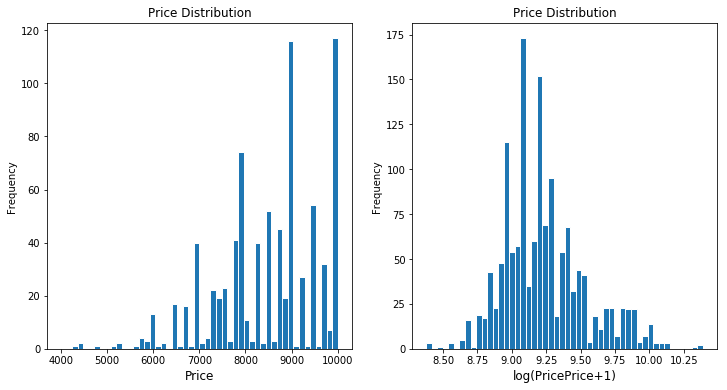

In [8]:
plt.subplot(1, 2, 1)
(df['Price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [4000, 10000]) # see min,max
plt.xlabel('Price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

plt.subplot(1, 2, 2)
np.log(df['Price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(PricePrice+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


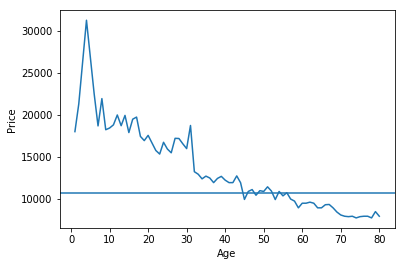

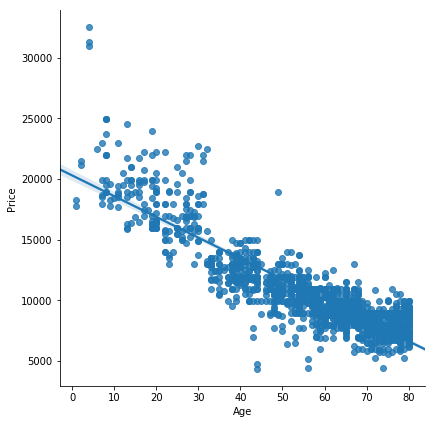

In [9]:
age_price_plot = df.groupby('Age')['Price'].median().plot(kind='line')
age_price_plot.set_ylabel('Price')
h = age_price_plot.axhline(df['Price'].mean())


g = sns.pairplot(data=df, x_vars=['Age'], y_vars=['Price'], height=6, kind='reg')

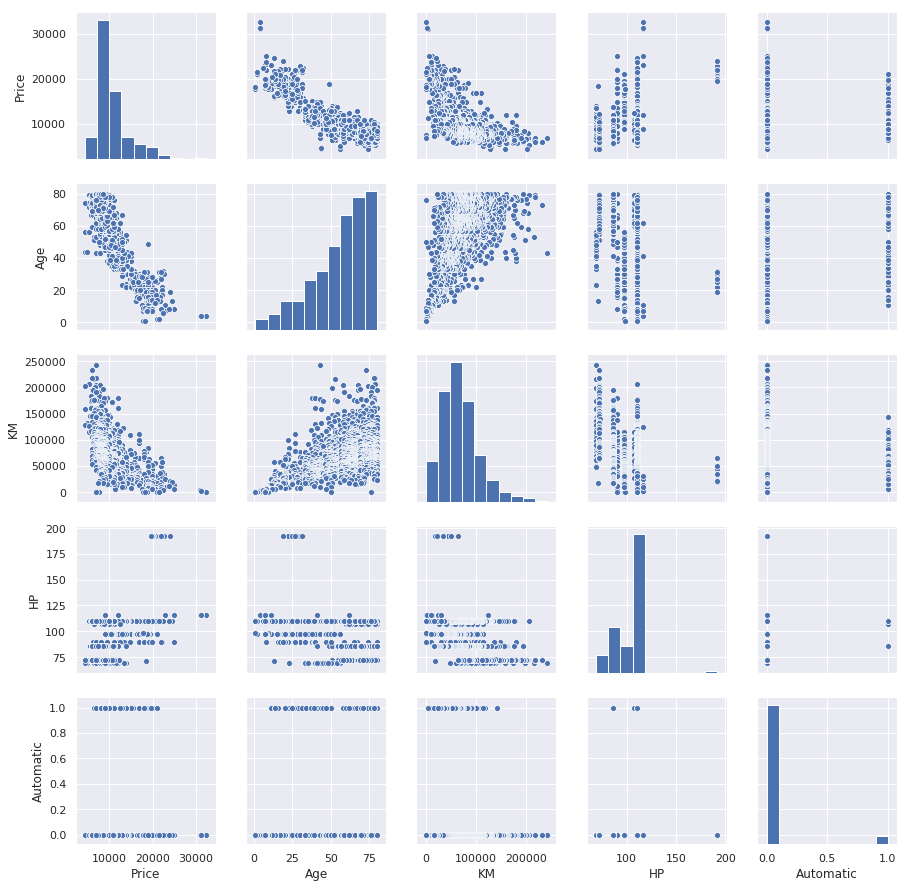

In [418]:
sns.set()
cols = ['Price', 'Age', 'KM', 'HP', 'Automatic']
sns.pairplot(df[cols], height = 2.5)
plt.show();

# Transform data set

In [11]:
dataset = df.values

In [340]:
# todo
# see to im prove this wiht https://www.kaggle.com/tomahim/data-analysis-preprocessing-and-price-prediction 
# result = df.DataFrame()
# result['FuelType'] = df['FuelType'].replace({"Diesel": 5, "Petrol": 4, "CNG": 3, "NA": 0})
# result.head()

# transform Diesel -> 1, Petrol -> 2, CNG->3, else 0
def resolve_fuel_type(x):   
    if x == "Diesel":
        return 1;
    elif x == "Petrol":
        return 2
    elif x == "CNG":
        return 3
    else:
        return 0

for item in dataset:
    is_string = type(item[3]) == str
    if is_string: 
        ft = resolve_fuel_type(item[3])
    else:
        ft = item[3]
    item[3] = ft
    
newDataset = []
for item in dataset:
    lineGood = item.tolist()[:]
    lineGood.append(1) #1 -> normal
    newDataset.append(lineGood)
    
    lineGood1 = item.tolist()[:]
    lineGood1[0] = (lineGood1[0] / 3) # price / 2
    lineGood1.append(1) #1 -> normal
    newDataset.append(lineGood1)

    lineBad = item.tolist()[:]
    lineBad[0] = (lineBad[0] * 2) # price * 2
    lineBad.append(0) #0 -> bad 
    newDataset.append(lineBad)
    
    lineBad2 = item.tolist()[:]
    lineBad2[1] = (lineBad2[1] * 2)
    lineBad2.append(0) #0 -> bad # Age * 2
    newDataset.append(lineBad2)
    
    lineBad3 = item.tolist()[:]
    lineBad3[2] = (lineBad3[2] * 2) # KM * 2
    lineBad3.append(0) #0 -> bad
    newDataset.append(lineBad3)
    
newDataset = np.array(newDataset)    
print(newDataset)

[[13500    23 46986 ...     3  1165     1]
 [ 4500    23 46986 ...     3  1165     1]
 [27000    23 46986 ...     3  1165     0]
 ...
 [13900    76     1 ...     5  1114     0]
 [ 6950   152     1 ...     5  1114     0]
 [ 6950    76     2 ...     5  1114     0]]


In [341]:
X = newDataset[:,0:10]
Y = newDataset[:,10]
print(Y)
print(X)

[1 1 0 ... 0 0 0]
[[13500    23 46986 ...  2000     3  1165]
 [ 4500    23 46986 ...  2000     3  1165]
 [27000    23 46986 ...  2000     3  1165]
 ...
 [13900    76     1 ...  1600     5  1114]
 [ 6950   152     1 ...  1600     5  1114]
 [ 6950    76     2 ...  1600     5  1114]]


In [342]:
Y_scale = Y

In [343]:
from sklearn import preprocessing

In [344]:
# Docs for the scaler https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
x_scaler = preprocessing.MinMaxScaler()
x_scaler.fit(X)
X_scale = x_scaler.transform(X)


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [345]:
X_scale

array([[1.89614477e-01, 1.38364780e-01, 9.66771537e-02, ...,
        1.00000000e+00, 3.33333333e-01, 2.68292683e-01],
       [4.79937057e-02, 1.38364780e-01, 9.66771537e-02, ...,
        1.00000000e+00, 3.33333333e-01, 2.68292683e-01],
       [4.02045633e-01, 1.38364780e-01, 9.66771537e-02, ...,
        1.00000000e+00, 3.33333333e-01, 2.68292683e-01],
       ...,
       [1.95908733e-01, 4.71698113e-01, 0.00000000e+00, ...,
        4.28571429e-01, 1.00000000e+00, 1.85365854e-01],
       [8.65460268e-02, 9.49685535e-01, 0.00000000e+00, ...,
        4.28571429e-01, 1.00000000e+00, 1.85365854e-01],
       [8.65460268e-02, 4.71698113e-01, 2.05761740e-06, ...,
        4.28571429e-01, 1.00000000e+00, 1.85365854e-01]])

In [346]:
from sklearn.model_selection import train_test_split

In [347]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y_scale, test_size=0.3)

In [348]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [349]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

((5026, 10), (1077, 10), (1077, 10), (5026,), (1077,), (1077,))


# Building and Training Neural Network

In [350]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
import tensorflow as tf 
from keras import regularizers

In [351]:
# complex model
model = Sequential([
    Dense(4, activation='relu', input_shape=(10,)),
    Dense(8, activation='tanh'),
    Dense(12, activation='sigmoid'),
    Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Dropout(0.3),
    # linear | sigmoid
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    # Dense(1, kernel_regularizer=regularizers.l2(0.01)),
    # Activation(tf.nn.softmax)
])

In [352]:
# optimizer='adam' | 'sgd' | 'adamax' 
# loss 
# binary_crossentropy (YES/NO) -> sigmoid
# categorical_crossentropy (= more then 2 lables) -> softmax
# sparse_categorical_crossentropy
# mean_squared_error
# mean_absolute_percentage_error

model.compile(optimizer='adamax',
              loss='binary_crossentropy',
              metrics=['binary_accuracy']   # metrics= mean_squared_error | accuracy
             )

In [353]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 5026 samples, validate on 1077 samples
Epoch 1/100
5026/5026 [==============================] - 6s 1ms/step - loss: 0.7282 - binary_accuracy: 0.6060 - val_loss: 0.7195 - val_binary_accuracy: 0.5952
Epoch 2/100
5026/5026 [==============================] - 1s 287us/step - loss: 0.7069 - binary_accuracy: 0.6060 - val_loss: 0.7032 - val_binary_accuracy: 0.5952
Epoch 3/100
5026/5026 [==============================] - 2s 340us/step - loss: 0.6936 - binary_accuracy: 0.6060 - val_loss: 0.6910 - val_binary_accuracy: 0.5952
Epoch 4/100
5026/5026 [==============================] - 2s 326us/step - loss: 0.6834 - binary_accuracy: 0.6060 - val_loss: 0.6821 - val_binary_accuracy: 0.5952
Epoch 5/100
5026/5026 [==============================] - 1s 293us/step - loss: 0.6745 - binary_accuracy: 0.6060 - val_loss: 0.6716 - val_binary_accuracy: 0.5952
Epoch 6/100
5026/5026 [==============================] - 1s 250us/step - loss: 0.6636 - binary_accuracy: 0.6060 - val_loss: 0.6575 - val_binary_accur

5026/5026 [==============================] - 2s 308us/step - loss: 0.2743 - binary_accuracy: 0.9065 - val_loss: 0.2724 - val_binary_accuracy: 0.8960
Epoch 52/100
5026/5026 [==============================] - 1s 276us/step - loss: 0.2734 - binary_accuracy: 0.9035 - val_loss: 0.2726 - val_binary_accuracy: 0.9006
Epoch 53/100
5026/5026 [==============================] - 1s 289us/step - loss: 0.2740 - binary_accuracy: 0.9063 - val_loss: 0.2722 - val_binary_accuracy: 0.8988
Epoch 54/100
5026/5026 [==============================] - 1s 271us/step - loss: 0.2737 - binary_accuracy: 0.9047 - val_loss: 0.2720 - val_binary_accuracy: 0.8969
Epoch 55/100
5026/5026 [==============================] - 1s 272us/step - loss: 0.2734 - binary_accuracy: 0.9047 - val_loss: 0.2716 - val_binary_accuracy: 0.8979
Epoch 56/100
5026/5026 [==============================] - 1s 240us/step - loss: 0.2742 - binary_accuracy: 0.9033 - val_loss: 0.2716 - val_binary_accuracy: 0.8969
Epoch 57/100
5026/5026 [=================

In [354]:
t1 = model.evaluate(X_test, Y_test)[0]
#print(X_test)
#print(Y_test)
print(t1)


1077/1077 [==============================] - 0s 247us/step
0.26832146080644903


In [355]:
import matplotlib.pyplot as plt

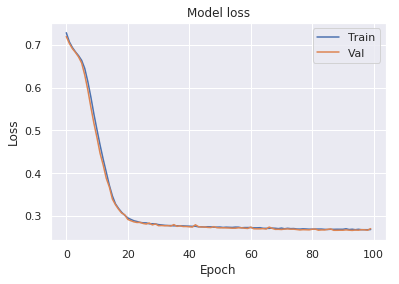

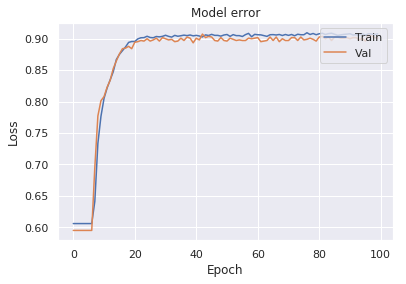

In [356]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('Model error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Predict

In [417]:
# idx = 3
# input = newDataset[:,0:10][idx]
# print(newDataset[:,0:10][idx])
# actual = Y_scale[idx]
# actual


# 			Price	Age		KM		FuelType	HP		MetColor	Automatic	CC		Doors	Weight
line = [	15500, 	40, 	46986, 	1, 			90, 	1, 			1, 			2000, 	3, 		1165];

prediction = model.predict(x_scaler.transform(np.array([line])))


print(prediction[0][0])
if round(prediction[0][0], 0) == 1:
    print('FAIR_PRICE')
else:
    print('BAD_DEAL')

0.73887044
FAIR_PRICE
